# Reproducing results

This notebook shows how the results produced by the original paper can be reproduced by running several experiments on different datasets. For the reproduction, the original datasets from the paper are used.

First, we want to do some imports. We also want to define our working directory path.

In [41]:
from matplotlib.font_manager import json_dump
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import sys
import math

#cwd = os.getcwd()

#WORKDIR_PATH = os.path.dirname(os.path.realpath(cwd)) + "/../../"
#sys.path.insert(1, WORKDIR_PATH)


cwd = os.getcwd()
WORKDIR_PATH = os.path.dirname(os.path.dirname(cwd+'/../../'))

sys.path.insert(0, WORKDIR_PATH)

from preprocess_data import preprocess
from base.train_scinet import train_scinet

WORKDIR_PATH = os.path.dirname(os.path.dirname(cwd+'/reprod/'))
sys.path.insert(1, WORKDIR_PATH)


Next, we need to load the data, in this case we will use the "ETTh1.csv' dataset, and do some preprocessing steps before we can use it for training. We indicate what data-format is used, we define the training, validation and test fractions, and the horizon and lookback-window we want to use for training. 

In [42]:
#============= Preprocessing ==============

#data_format = ["timestamp","open","high","low","close","volume",]
data_format = ["price"]
                    
fraction_used = 1
train_frac = 0.6
val_frac = 0.2
test_frac = 0.2

X_LEN = 48
Y_LEN = 24
RANDOM_SEED = 4321#None
OVERLAPPING = True
STANDARDIZE = True

standardization_settings = {'per_sample': True,
                            'leaky': False,
                            'mode': 'log', #only if per sample is false, choose from log, sqrt or lin
                            'sqrt_val': 2, #of course only if mode is sqrt
                            'total mean': [],
                            'total std': []}

pairs = ["HUFL", "HULL", "MUFL", "MULL", "LUFL", "LULL", "OT"]

#df = pd.read_csv(os.path.dirname(os.path.dirname(cwd+'/data/Data_preprocessed/ETTh1.csv'))).dropna()
df = pd.read_csv(f"/Users/lindsayspoor/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studiedocumenten/2021-2022/ADL/SCINet_repo/exp/reprod/data/Data_preprocessed/ETTh1.csv").dropna()
df = df.swapaxes("index", "columns")

data = {}
for idx, pair in enumerate(pairs):
    data[pair] = df.iloc[idx]

Next, we want to start the training process, i.e. training SCINet on the dataset. For more instructions on how the training works, follow the instructions in the training_scinet.ipynb notebook. The number of training epochs is by defauklt set to 150 and the hyperparameters are corresponding with the original set of hyperparameters from the original code:

https://github.com/cure-lab/SCINet/blob/main/Appendix/Appendix.pdf

Note that the number of training epochs for now is set to 10 in order to see how the results will follow. The paper sets the number of epochs by default to a maximum of 150. Make sure that in train_scinet the patience of the 'callback.EarlyStopping' is turned off for 150 training epochs, because it otherwise stops after the validation loss has been decreasing for the past 25 epochs. 

In [43]:
#================ Training ====================

EPOCHS = 10
BATCH_SIZE = 8
HID_SIZE = 4
NUM_LEVELS = 3
KERNEL_SIZE = 5
DROPOUT = 0.5
LEARNING_RATE = 0.003
PROBABILISTIC = False

# Process data:
results = preprocess(   data = data, 
                        symbols = pairs,
                        data_format = data_format,
                        fraction = fraction_used,
                        train_frac = train_frac,
                        val_frac = val_frac,
                        test_frac = test_frac,
                        X_LEN = X_LEN,
                        Y_LEN = Y_LEN,
                        OVERLAPPING = OVERLAPPING,
                        STANDARDIZE = STANDARDIZE,
                        standardization_settings = standardization_settings
                        )

model, history, X_train , y_train, X_val, y_val, X_test, y_test = train_scinet( X_train = results["X_train"].astype('float32'),
                                                                                y_train = results["y_train"].astype('float32'),
                                                                                X_val = results["X_val"].astype('float32'),
                                                                                y_val = results["y_val"].astype('float32'),
                                                                                X_test = results["X_test"].astype('float32'),
                                                                                y_test = results["y_test"].astype('float32'),
                                                                                epochs = EPOCHS,
                                                                                batch_size = BATCH_SIZE,
                                                                                X_LEN = X_LEN,
                                                                                Y_LEN = [Y_LEN],
                                                                                output_dim = [results["X_train"].shape[2]],
                                                                                selected_columns = None,
                                                                                hid_size= HID_SIZE,
                                                                                num_levels= NUM_LEVELS,
                                                                                kernel = KERNEL_SIZE,
                                                                                dropout = DROPOUT,
                                                                                loss_weights= [1],
                                                                                learning_rate = LEARNING_RATE,
                                                                                probabilistic = PROBABILISTIC)


Starting data preprocessing...
Making train/validation/test splits...
Making samples...


100%|███████████████████████████████████| 10379/10379 [00:01<00:00, 6619.82it/s]
/Users/lindsayspoor/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studiedocumenten/2021-2022/ADL/SCINet_repo/exp/reprod/preprocess_data.py:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  samples = np.array(samples)


Making samples...


100%|█████████████████████████████████████| 3411/3411 [00:00<00:00, 6894.07it/s]


Making samples...


100%|████████████████████████████████████| 3411/3411 [00:00<00:00, 21562.03it/s]


Making X-y splits...
===========================[SCINET]=====================================
Initializing training with data:
X_train: (10344, 48, 7), y_train: (10344, 24, 7)
X_val: (3411, 48, 7), y_val: (3411, 24, 7)
X_test: (3411, 48, 7), y_test: (3411, 24, 7)
Building model...
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 48, 7)]           0         
_________________________________________________________________
Block_0 (SCINet)             (None, 24, 7)             97332     
Total params: 97,332
Trainable params: 97,332
Non-trainable params: 0
_________________________________________________________________
None
Is null X: 0
Is null y: 0
Epoch 1/10
1293/1293 [==============================] - 31s 16ms/step - loss: 0.8599 - val_loss: 0.7279
Epoch 2/10
1293/1293 [==============================] - 19s 15ms/step - loss: 0.7671 - val_loss: 0.7

# Results 

In order to see whether our training and validation loss meet the results from the original paper, we need to set a target. The targets for MAEs of the corresponding datasets can be found in table 2 in the original paper.

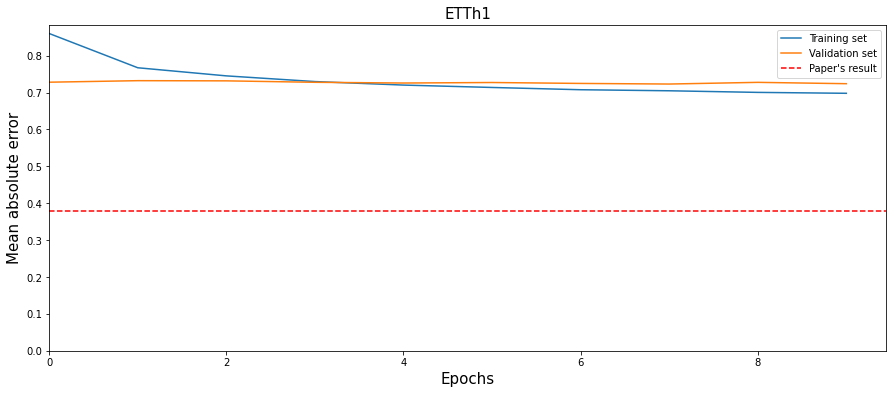

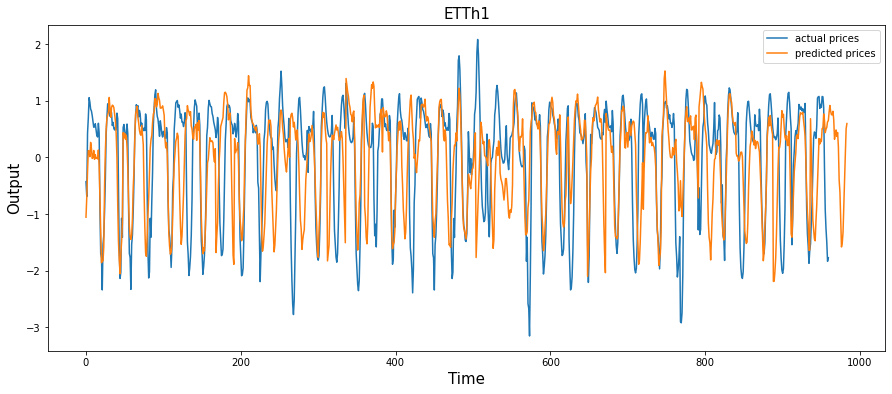

In [44]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
target = 0.379 #value of MAE of paper

X = np.arange(len(train_loss))

plt.figure(figsize=(15,6))
plt.plot(X, train_loss, label='Training set')
plt.plot(X, val_loss, label="Validation set")
plt.axhline(y=target, color='r', linestyle='--', label="Paper's result")
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Mean absolute error', fontsize=15)
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.title('ETTh1', fontsize=15)
plt.legend()
plt.show()

output = model(X_test)

series = 0
total_timesteps = 1000

X_time_blocks = math.floor( total_timesteps / X_LEN )
Y_time_blocks = math.floor( total_timesteps / Y_LEN )

actual_prices = np.array([])
for t in range(X_time_blocks):
    actual_prices = np.append(actual_prices, X_test[t*X_LEN,:,series])

predicted_prices = np.array([])
for t in range(Y_time_blocks):
    predicted_prices = np.append(predicted_prices, np.array(output[t*Y_LEN])[:,series])

X_times = np.arange(len(actual_prices))
Y_times = np.arange(len(predicted_prices))
plt.figure(figsize=(15,6))
plt.plot(X_times, actual_prices, label='actual prices')
plt.plot(Y_times, predicted_prices, label='predicted prices')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Output', fontsize=15)
plt.title('ETTh1', fontsize=15)
plt.legend()
plt.show()

# Leaky normalization

In order to truly compare our results with the original results from the paper, we have to compare it with the normalization method the paper uses. The paper uses a leaky normalization which can cause faulty values for the loss and therefore faulty predictions.

The code used in the paper normalizes the data by considering the entire feature column and normalizing this, see: https://github.com/cure-lab/SCINet/blob/c41c0a7303b79f2641ae213a596dedb609875367/data_process/financial_dataloader.py#L38 for the direct implementation. The code supports several normalization methods which all take the following steps: normalize the entire data set, create samples and split the data in a train- and test set. This is not a legitimate way to normalize the data, since the $y$ part of the data is also used to calculate the mean and standard deviation for normalization. Instead, one should use the $X$ part of the data only to normalize the $X$ and $y$ part of the data.

If we turn 'leaky' to True in standardization_settings(), the normalization method of the original paper is turned off and we can compare the results.

In [45]:
#============= Preprocessing ==============

#data_format = ["timestamp","open","high","low","close","volume",]
data_format = ["price"]
                    
fraction_used = 1
train_frac = 0.6
val_frac = 0.2
test_frac = 0.2

X_LEN = 48
Y_LEN = 24
RANDOM_SEED = 4321#None
OVERLAPPING = True
STANDARDIZE = True

standardization_settings = {'per_sample': True,
                            'leaky': True,
                            'mode': 'log', #only if per sample is false, choose from log, sqrt or lin
                            'sqrt_val': 2, #of course only if mode is sqrt
                            'total mean': [],
                            'total std': []}

pairs = ["HUFL", "HULL", "MUFL", "MULL", "LUFL", "LULL", "OT"]

#df = pd.read_csv(os.path.dirname(os.path.dirname(cwd+'/data/Data_preprocessed/ETTh1.csv'))).dropna()
df = pd.read_csv(f"/Users/lindsayspoor/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studiedocumenten/2021-2022/ADL/SCINet_repo/exp/reprod/data/Data_preprocessed/ETTh1.csv").dropna()
df = df.swapaxes("index", "columns")

data = {}
for idx, pair in enumerate(pairs):
    data[pair] = df.iloc[idx]

In [47]:
#================ Training ====================

EPOCHS = 10
BATCH_SIZE = 8
HID_SIZE = 4
NUM_LEVELS = 3
KERNEL_SIZE = 5
DROPOUT = 0.5
LEARNING_RATE = 0.003
PROBABILISTIC = False

# Process data:
results = preprocess(   data = data, 
                        symbols = pairs,
                        data_format = data_format,
                        fraction = fraction_used,
                        train_frac = train_frac,
                        val_frac = val_frac,
                        test_frac = test_frac,
                        X_LEN = X_LEN,
                        Y_LEN = Y_LEN,
                        OVERLAPPING = OVERLAPPING,
                        STANDARDIZE = STANDARDIZE,
                        standardization_settings = standardization_settings
                        )

model, history, X_train , y_train, X_val, y_val, X_test_leaky, y_test = train_scinet( X_train = results["X_train"].astype('float32'),
                                                                                y_train = results["y_train"].astype('float32'),
                                                                                X_val = results["X_val"].astype('float32'),
                                                                                y_val = results["y_val"].astype('float32'),
                                                                                X_test = results["X_test"].astype('float32'),
                                                                                y_test = results["y_test"].astype('float32'),
                                                                                epochs = EPOCHS,
                                                                                batch_size = BATCH_SIZE,
                                                                                X_LEN = X_LEN,
                                                                                Y_LEN = [Y_LEN],
                                                                                output_dim = [results["X_train"].shape[2]],
                                                                                selected_columns = None,
                                                                                hid_size= HID_SIZE,
                                                                                num_levels= NUM_LEVELS,
                                                                                kernel = KERNEL_SIZE,
                                                                                dropout = DROPOUT,
                                                                                loss_weights= [1],
                                                                                learning_rate = LEARNING_RATE,
                                                                                probabilistic = PROBABILISTIC)



Starting data preprocessing...
Making train/validation/test splits...
Making samples...


100%|███████████████████████████████████| 10379/10379 [00:02<00:00, 4173.61it/s]


Making samples...


100%|█████████████████████████████████████| 3411/3411 [00:00<00:00, 6374.29it/s]


Making samples...


100%|█████████████████████████████████████| 3411/3411 [00:00<00:00, 6265.28it/s]


Making X-y splits...
===========================[SCINET]=====================================
Initializing training with data:
X_train: (10343, 48, 7), y_train: (10343, 24, 7)
X_val: (3411, 48, 7), y_val: (3411, 24, 7)
X_test: (3411, 48, 7), y_test: (3411, 24, 7)
Building model...
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 48, 7)]           0         
_________________________________________________________________
Block_0 (SCINet)             (None, 24, 7)             97332     
Total params: 97,332
Trainable params: 97,332
Non-trainable params: 0
_________________________________________________________________
None
Is null X: 0
Is null y: 0
Epoch 1/10
1293/1293 [==============================] - 32s 16ms/step - loss: 0.8552 - val_loss: 0.7286
Epoch 2/10
1293/1293 [==============================] - 21s 16ms/step - loss: 0.7694 - val_loss: 0.7

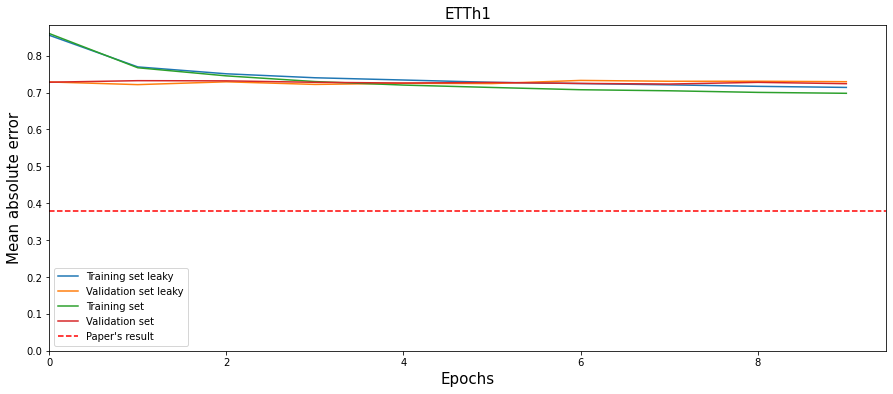

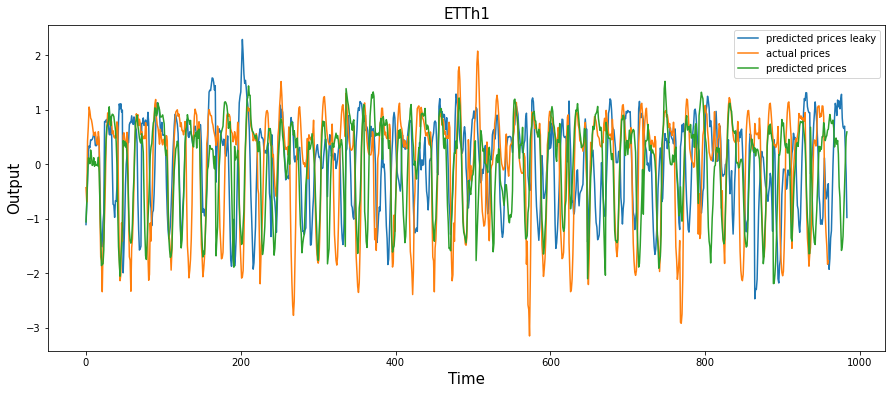

In [48]:
train_loss_leaky = history.history['loss']
val_loss_leaky = history.history['val_loss']
target = 0.379 #value of MAE of paper

X = np.arange(len(train_loss_leaky))

plt.figure(figsize=(15,6))
plt.plot(X, train_loss_leaky, label='Training set leaky')
plt.plot(X, val_loss_leaky, label="Validation set leaky")
plt.plot(X, train_loss, label='Training set')
plt.plot(X, val_loss, label="Validation set")
plt.axhline(y=target, color='r', linestyle='--', label="Paper's result")
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Mean absolute error', fontsize=15)
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.title('ETTh1', fontsize=15)
plt.legend()
plt.show()

output_leaky = model(X_test_leaky)

series = 0
total_timesteps = 1000

X_time_blocks = math.floor( total_timesteps / X_LEN )
Y_time_blocks = math.floor( total_timesteps / Y_LEN )


predicted_prices_leaky = np.array([])
for t in range(Y_time_blocks):
    predicted_prices_leaky = np.append(predicted_prices_leaky, np.array(output_leaky[t*Y_LEN])[:,series])

Y_times_leaky = np.arange(len(predicted_prices_leaky))
plt.figure(figsize=(15,6))
plt.plot(Y_times_leaky, predicted_prices_leaky, label='predicted prices leaky')
plt.plot(X_times, actual_prices, label='actual prices')
plt.plot(Y_times, predicted_prices, label='predicted prices')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Output', fontsize=15)
plt.title('ETTh1', fontsize=15)
plt.legend()
plt.show()

As we can see, the loss for the leaky normalization differs from our normalization method and therefore, the predicted price also differ from each other.